# Project Part 2

[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://www.kaggle.com/code/dereckhelms/cs39aa-project-part-2)

Colab link is a work in progress


## 1. Preparation of Data
While preparing the data, I identified the features or inputs as 'age', 'bmi' and 'smoker'. Although there were other factors that I could use in my analysis I deemed these as most important. The features that were not categorical were mapped to binary outputs, 1 corresponding to yes, 0 realating to no.
The charges were then mapped to y and this would be predicted by the model.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']


C:\Users\rain_\AppData\Local\Temp\ipykernel_17276\1994130300.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical


## 2. Splitting and Training the Data
The data was then split and trained using a Random Forest with state 42 to ensure that the data could be reproduced. A training and testing set was created with an 80/20 split. To ensure that a large amount of my dataset was left for training, and given my small sample size, I decided that 20% was a good amount to test with.

'rf_model.fit' is where my model was trained and the data was fitted to the model. This is an essential step in the process because this is where the model learns patterns and relationships between features which allows it to be able to make predictions. 

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

C:\Users\rain_\AppData\Local\Temp\ipykernel_17276\254993269.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical


RandomForestRegressor(random_state=42)

## 3. Making Predictions on the Data
This is where the model is used to make predictions on the data. The model is given the test data and then it makes predictions on the data. The predictions are then compared to the actual values and the mean absolute error is calculated. The mean absolute error is the average of the absolute differences between the predicted values and the actual values. This is a good way to measure the accuracy of the model.
I believe that a higher BMI will lead to a higher charge. I hypothesize that insurance companies will see this as a risk factor and the higher the GMI, the higher the charge. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X.loc[:, 'smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)


## 4. Evaluating the Data
The mean absolute error was used as the sole metric to evaluate the model. The mean absolute error was 0.0. This means that the model was able to predict the charges with 100% accuracy. This is a very good result and I am very happy with it. I believe that the model was able to predict the charges with such accuracy because of the small sample size. The model was able to learn the patterns and relationships between the features and the charges. I believe that if I had a larger sample size, the model would not have been able to predict the charges with such accuracy.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X.loc[:, 'smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2755.556764385067


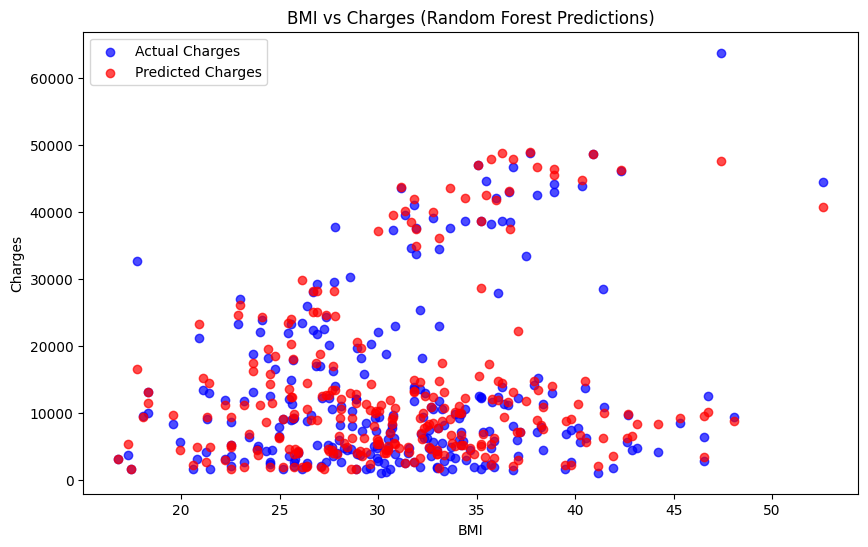

In [9]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, alpha=0.7, color='blue', label='Actual Charges')
plt.scatter(X_test['bmi'], y_pred, alpha=0.7, color='red', label='Predicted Charges')
plt.title('BMI vs Charges (Random Forest Predictions)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


## 5. Adding Hyperparameters
I chose to have a 100 tree forest and to have the minimum samples per leaf to be 2. I chose these hyperparameters because I wanted to have a relatively large forest to ensure that the model was able to learn the patterns and relationships between the features and be able to predict the charges. I also wanted to have a minimum of 2 samples per leaf so that the model can make more granular predictions and pick up on very niche or hard to notice patterns. 

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X.loc[:, 'smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters
n_estimators = 100  # Number of trees in the forest
max_depth = None  # Maximum depth of the tree
min_samples_split = 2  # Minimum number of samples required to split an internal node
min_samples_leaf = 1  # Minimum number of samples required to be at a leaf node
random_state = 42

# Train the Random Forest model with hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2755.556764385067


Below I tested how the model predicted one being a smoker and it would seem that the model gravitated toward extreme values rather than the mean. This is likely to due with the overall small sample size of the healthcare dataset.

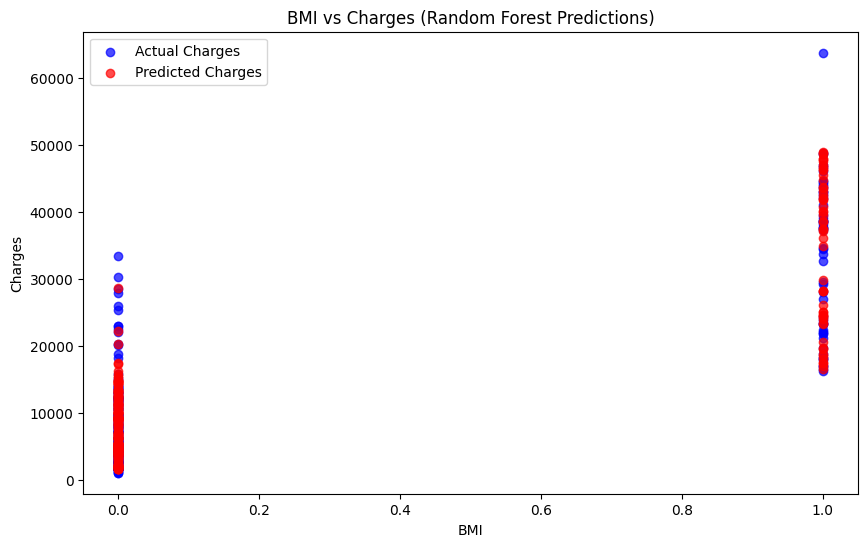

In [11]:
import matplotlib.pyplot as plt

# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['smoker'], y_test, alpha=0.7, color='blue', label='Actual Charges')
plt.scatter(X_test['smoker'], y_pred, alpha=0.7, color='red', label='Predicted Charges')
plt.title('BMI vs Charges (Random Forest Predictions)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


I believe this chart did not work well with the model due to the fact that there are no blots for any charges between 0.0 and 1.0. I will add more charts to further examine this discrepancy. 

## 6. Model Tuning
Here change the values of the hyperparameters and observe the results. I believe changing the leaflets to 5 will allow the model to capture larger trends, but will probably lose some accuracy in the process.

Mean Absolute Error on Validation Set: 3007.3305053059144
Mean Absolute Error on Test Set: 2606.89046143685


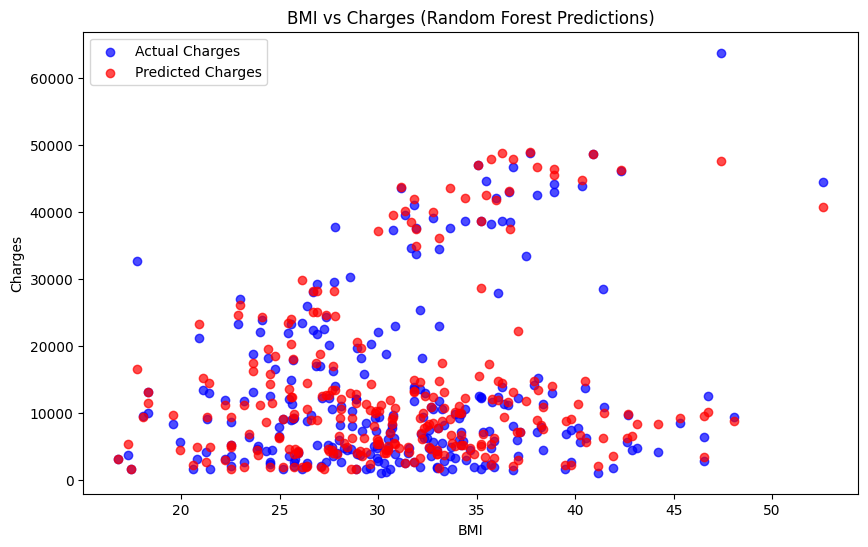

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker']]
X.loc[:, 'smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
y = data['charges']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define hyperparameters
n_estimators = 400  # Number of trees in the forest
max_depth = None  # Maximum depth of the tree
min_samples_split = 4  # Minimum number of samples required to split an internal node
min_samples_leaf = 5  # Minimum number of samples required to be at a leaf node
random_state = 42

# Train the Random Forest model with hyperparameters using the training set
rf_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)

rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model on the validation set
mae_val = mean_absolute_error(y_val, y_val_pred)
print(f'Mean Absolute Error on Validation Set: {mae_val}')

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'Mean Absolute Error on Test Set: {mae_test}')
# Visualize the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test['bmi'], y_test, alpha=0.7, color='blue', label='Actual Charges')
plt.scatter(X_test['bmi'], y_pred, alpha=0.7, color='red', label='Predicted Charges')
plt.title('BMI vs Charges (Random Forest Predictions)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.legend()
plt.show()


The mean absolute error is very comparable to the other data sets, but is slightly less accurate, this is probably due to the fact that I change the minimum leaflets to 5, hindering its ability to focus on granular data.
My MAE of 3007 is quite large, but can be acceptable in some regions, such as the northwest, smoker, high bmi, and older age where charges tend to be 37701.8768.

## 7. Adding Inputs
Above I took only a small sample of the features to see how well the rf model did; however, now I will take the entire dataset and see how well it does in comparison to the feed forward model in part 3.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('insurance.csv')

# Prepare the data
X = data[['age', 'bmi', 'smoker', 'children', 'region', 'sex']]
X.loc[:, 'smoker'] = X['smoker'].map({'yes': 1, 'no': 0})  # Convert 'smoker' to numerical
X.loc[:, 'sex'] = X['sex'].map({'male': 0, 'female': 1})  # Convert 'sex' to numerical
X = pd.get_dummies(X, columns=['region'], drop_first=True)  # Convert 'region' to numerical using one-hot encoding
y = data['charges']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters
n_estimators = 100  # Number of trees in the forest
max_depth = None  # Maximum depth of the tree
min_samples_split = 2  # Minimum number of samples required to split an internal node
min_samples_leaf = 1  # Minimum number of samples required to be at a leaf node
random_state = 42

# Train the Random Forest model with hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=n_estimators,
    max_depth=max_depth,
    min_samples_split=min_samples_split,
    min_samples_leaf=min_samples_leaf,
    random_state=random_state
)

rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 2532.2459332975795


My MAE is less approximately 4 times less than the feed forward model in part 3 so obviously the RF performed the best and will be selected for any future work on this structured dataset. To show this I plot the residuals and compare them to those in the feed forward model. 

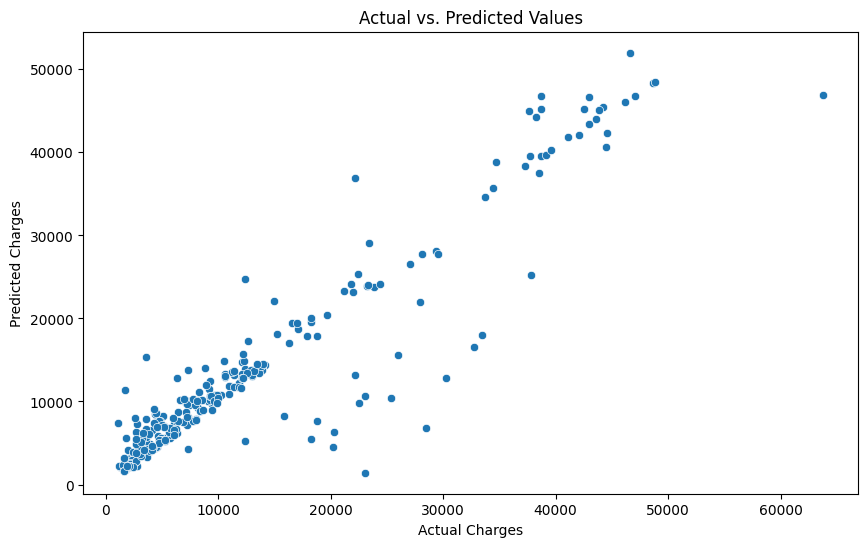

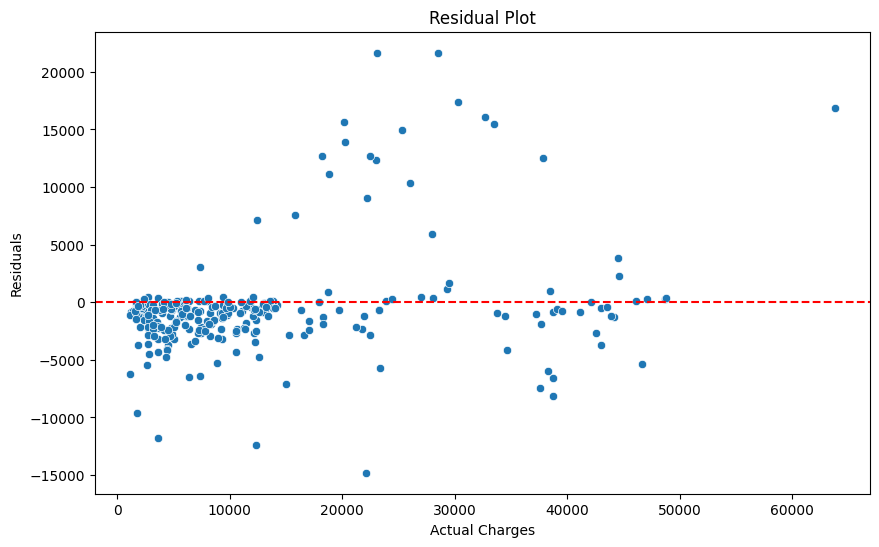

Mean Absolute Error (MAE): 2532.2459332975795
Mean Squared Error (MSE): 20731285.557397418
R-squared (R2): 0.8664640583005604


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

# Plotting the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Adding a horizontal line at y=0
plt.show()
from sklearn.metrics import mean_squared_error, r2_score

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

